# CNN Model for Breast Cancer Histology Image Classification

In [6]:
# 1. Imports
import os
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [7]:
# 2. Load preprocessed data
with open('/content/images.p', 'rb') as f:
    images = pickle.load(f)

with open('/content/labels.p', 'rb') as f:
    labels = pickle.load(f)

print(f"Image shape: {images.shape}, Labels shape: {labels.shape}")

Image shape: (11000, 100, 100), Labels shape: (11000,)


In [13]:
import numpy as np
n_persons = len(set(labels))
print("Number of persons:" , n_persons)
label_mapping = le.inverse_transform(np.arange(n_persons))
for i in range(len(label_mapping)):
  print(i,":",label_mapping[i])

Number of persons: 10
0 : Tomato___Bacterial_spot
1 : Tomato___Early_blight
2 : Tomato___Late_blight
3 : Tomato___Leaf_Mold
4 : Tomato___Septoria_leaf_spot
5 : Tomato___Spider_mites Two-spotted_spider_mite
6 : Tomato___Target_Spot
7 : Tomato___Tomato_Yellow_Leaf_Curl_Virus
8 : Tomato___Tomato_mosaic_virus
9 : Tomato___healthy


In [8]:
# 3. Normalize and reshape
images = images / 255.0
images = images.reshape(-1, 100, 100, 1)  # grayscale

In [9]:
# 4. Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

In [10]:
# 5. Train-test split
X_train, X_val, y_train, y_val = train_test_split(images, labels_categorical, test_size=0.2, random_state=42, stratify=labels_encoded)

In [11]:
# 6. Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# 7. Train model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=20,batch_size=32,callbacks=[early_stop])

Epoch 1/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.2135 - loss: 2.1032 - val_accuracy: 0.5123 - val_loss: 1.4403
Epoch 2/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4757 - loss: 1.4843 - val_accuracy: 0.6123 - val_loss: 1.1513
Epoch 3/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5552 - loss: 1.2532 - val_accuracy: 0.6314 - val_loss: 1.0598
Epoch 4/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6088 - loss: 1.1120 - val_accuracy: 0.6927 - val_loss: 0.8949
Epoch 5/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6434 - loss: 0.9934 - val_accuracy: 0.7227 - val_loss: 0.7989
Epoch 6/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6655 - loss: 0.9141 - val_accuracy: 0.7318 - val_loss: 0.7522
Epoch 7/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7001 - loss: 0.8479 - val_accuracy: 0.7595 - val_loss: 0.6894
Epoch 8/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7356 - loss: 0.7401 - val_acc

Text(0.5, 0, 'epoch')

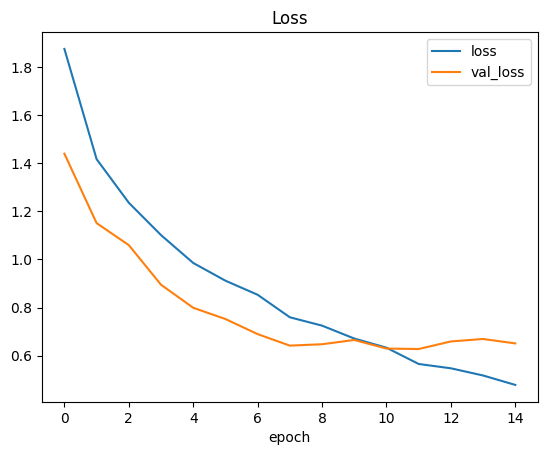

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

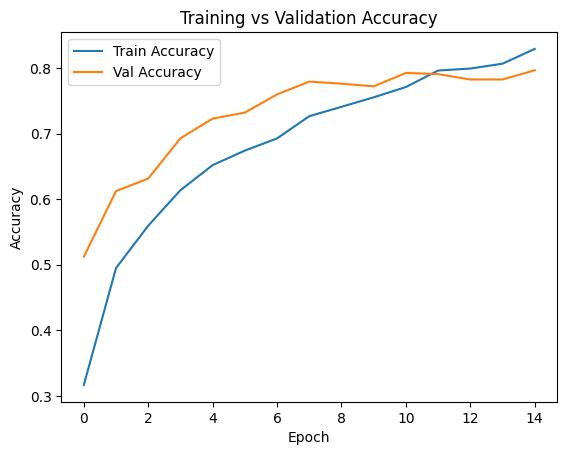

In [14]:
# 9. Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [41]:
from google.colab import files
upload=files.upload()

Saving sepotoriaspot_ (5).JPG to sepotoriaspot_ (5).JPG


In [42]:
d=list(upload.keys())[0]
print(d)

sepotoriaspot_ (5).JPG


[255 216 255 ...  63 255 217]


/tmp/ipython-input-43-3234995974.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a=np.fromstring(upload[d],np.uint8)


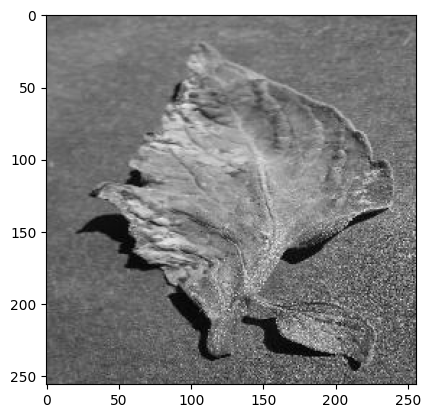

In [43]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_UNCHANGED)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

In [44]:
def preprocessing(img):
    img = img / 255.0  # Scale pixel values to be between 0 and 1
    return img

In [45]:
img=np.asarray(img)
img=cv2.resize(img,(100,100))
img=preprocessing(img)
img=img.reshape(1,100,100,1)
prediction=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [46]:
p=np.argmax(prediction)
print(p)

4
